In [1]:
from cmp import main
from matplotlib import pyplot as plt

In [23]:
colors = {
    "python": "#008b8b",
    "python2": "#008b8b",
    "pypy": "#008b8b",
    "c++": "pink",
    "java": "brown",
    "lisp": "cyan",
    "clisp": "cyan",
}

In [2]:
results = main()

{'data': [('c++', 0.005833854508954425),
          ('java', 0.07635915279388428),
          ('lisp', 0.01246352254608531),
          ('python', 0.03438959916432698),
          ('python2', 0.017135199853929424)],
 'program': 'hello_world'}


{'data': [('c++', 0.011554304210618994),
          ('java', 0.08451209465662639),
          ('lisp', 0.04425262368243674),
          ('python', 0.4270164171854655),
          ('python2', 0.3434421221415202)],
 'program': 'fibonacci'}


In [24]:
def plot_result(program, data):
    plt.title('program: %s' % program)
    plt.bar([d[0] for d in data], height=[d[1] for d in data], color=[colors[d[0]] for d in data])
    plt.ylabel('seconds')
    plt.show()

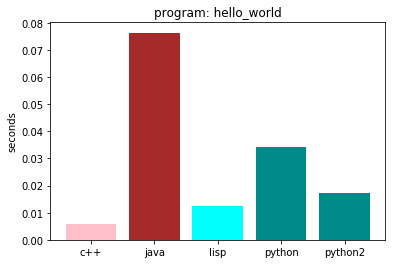

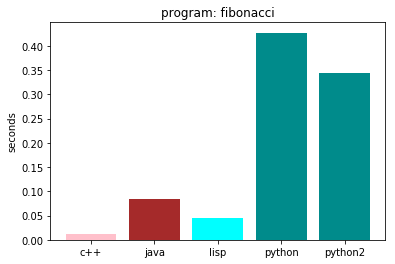

In [25]:
for result in results:
    plot_result(**result)